In [ ]:
# 1. What is unsupervised learning in the context of machine learning?
# Unsupervised learning is a type of machine learning where the model learns patterns from data without labeled outcomes. 
#It’s mainly used for clustering and dimensionality reduction.

In [ ]:
# 2. How does K-Means clustering algorithm work?
# K-Means partitions data into K clusters by initializing centroids, assigning data points to the nearest centroid,
#recalculating centroids, and repeating until convergence.

In [ ]:
# 3. Explain the concept of a dendrogram in hierarchical clustering.
# A dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering, 
#visually representing how clusters are formed.

In [ ]:
# 4. What is the main difference between K-Means and Hierarchical Clustering?
# K-Means requires the number of clusters in advance and is flat, while Hierarchical Clustering builds a tree 
#and doesn't need a pre-specified number of clusters.

In [ ]:
# 5. What are the advantages of DBSCAN over K-Means?
# DBSCAN can find arbitrarily shaped clusters, handles noise, and doesn't require the number of clusters in advance, unlike K-Means.

In [ ]:
# 6. When would you use Silhouette Score in clustering?
# Use Silhouette Score to evaluate how well-separated and compact clusters are; it helps to select the optimal number of clusters.

In [ ]:
# 7. What are the limitations of Hierarchical Clustering?
# It’s computationally expensive, not scalable for large datasets, and sensitive to noise and outliers.

In [ ]:
# 8. Why is feature scaling important in clustering algorithms like K-Means?
# K-Means uses Euclidean distance, so features with larger scales can dominate the result unless scaled properly.

In [ ]:
# 9. How does DBSCAN identify noise points?
# DBSCAN marks a point as noise if it has fewer neighbors than the minimum points (`min_samples`) within the given radius (`eps`).

In [ ]:
# 10. Define inertia in the context of K-Means.
# Inertia is the sum of squared distances between each data point and its assigned cluster centroid. Lower inertia means tighter clusters.

In [ ]:
# 11. What is the elbow method in K-Means clustering?
# It involves plotting inertia vs. the number of clusters and finding the "elbow" point where the decrease slows, indicating the optimal K.

In [ ]:
# 12. Describe the concept of "density" in DBSCAN.
# Density refers to the number of data points within a given radius (eps). DBSCAN uses this to define core, border, and noise points.

In [ ]:
# 13. Can hierarchical clustering be used on categorical data?
# Not directly; it needs a suitable distance metric for categorical data, like Gower or Hamming distance.

In [ ]:
# 14. What does a negative Silhouette Score indicate?
# It means the data point is likely assigned to the wrong cluster and is closer to another cluster than its own.

In [ ]:
# 15. Explain the term "linkage criteria" in hierarchical clustering.
# It defines how distances between clusters are calculated: single (min), complete (max), average (mean), or ward (variance-based).

In [ ]:
# 16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
# K-Means assumes spherical, equally-sized clusters and uses distance from centroids, so it struggles with unequal densities or shapes.

In [ ]:
# 17. What are the core parameters in DBSCAN, and how do they influence clustering?
# `eps` (radius) and `min_samples` (minimum neighbors) determine what constitutes a dense region and influence the number of clusters and noise.

In [ ]:
# 18. How does K-Means++ improve upon standard K-Means initialization?
# K-Means++ initializes centroids to be distant from each other, reducing chances of poor clustering and speeding up convergence.

In [ ]:
# 19. What is agglomerative clustering?
# It’s a bottom-up hierarchical clustering method where each data point starts as a single cluster, 
#and clusters merge iteratively based on linkage criteria.

In [ ]:
# 20. What makes Silhouette Score a better metric than just inertia for model evaluation?
# Silhouette Score considers both intra-cluster compactness and inter-cluster separation, while inertia only considers compactness.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

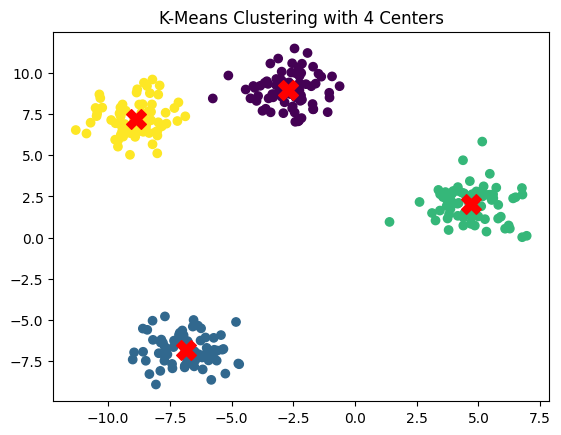

In [2]:
# 21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot
X, y = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering with 4 Centers")
plt.show()

In [3]:
# 22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels
iris = load_iris()
X_iris = iris.data
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_iris)
print("First 10 predicted labels:", labels[:10])

First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


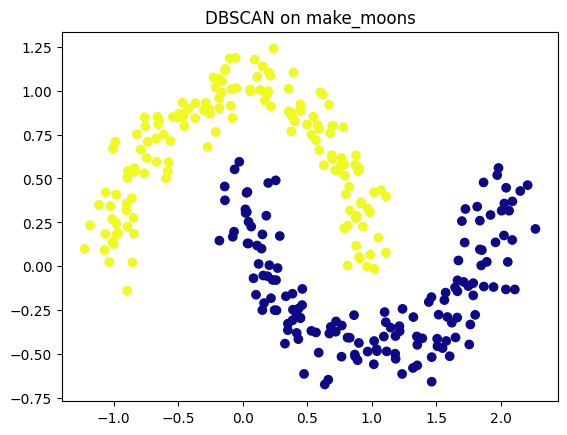

In [4]:
# 23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap='plasma')
plt.title("DBSCAN on make_moons")
plt.show()

In [5]:
# 24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster
wine = load_wine()
X_wine = StandardScaler().fit_transform(wine.data)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_wine)
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))

Cluster sizes: {0: 65, 1: 51, 2: 62}


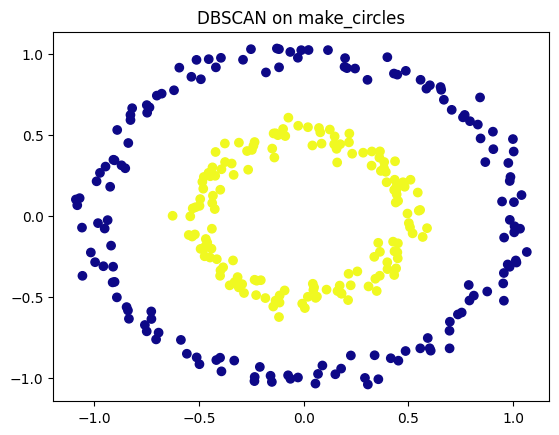

In [6]:
# 25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap='plasma')
plt.title("DBSCAN on make_circles")
plt.show()

In [7]:
# 26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids
data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
print("Cluster Centroids:\n", kmeans.cluster_centers_)

Cluster Centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


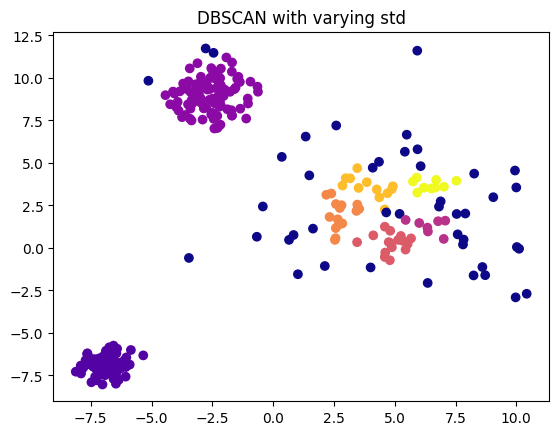

In [8]:
# 27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
db = DBSCAN(eps=0.8, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap='plasma')
plt.title("DBSCAN with varying std")
plt.show()

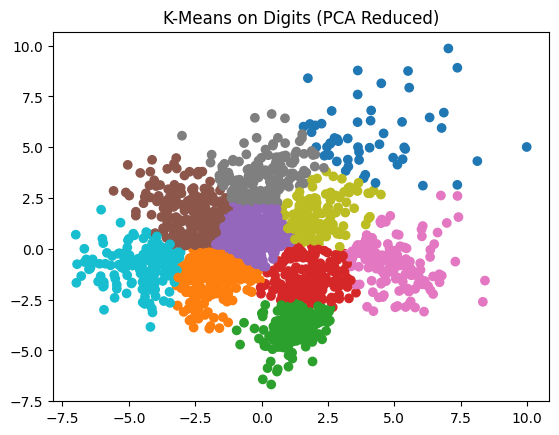

In [9]:
# 28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means
digits = load_digits()
X_digits = StandardScaler().fit_transform(digits.data)
X_pca = PCA(n_components=2).fit_transform(X_digits)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='tab10')
plt.title("K-Means on Digits (PCA Reduced)")
plt.show()

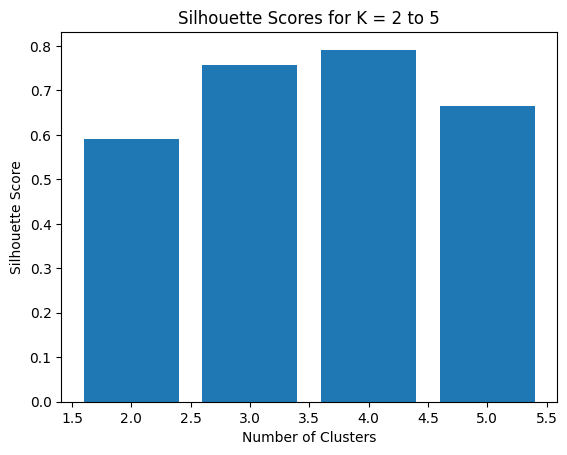

In [10]:
# 29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
scores = []
for k in range(2, 6):
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X)
    scores.append(silhouette_score(X, labels))
plt.bar(range(2, 6), scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for K = 2 to 5")
plt.show()

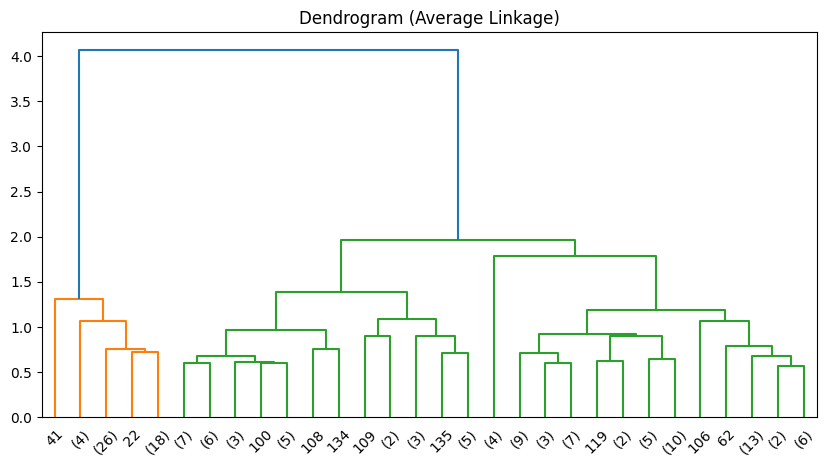

In [11]:
# 30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage
Z = linkage(X_iris, method='average')
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', p=30)
plt.title("Dendrogram (Average Linkage)")
plt.show()

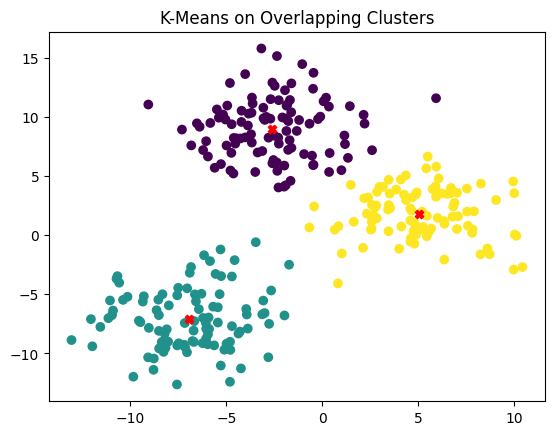

In [12]:
# 31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries
X, y = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', c='red')
plt.title("K-Means on Overlapping Clusters")
plt.show()

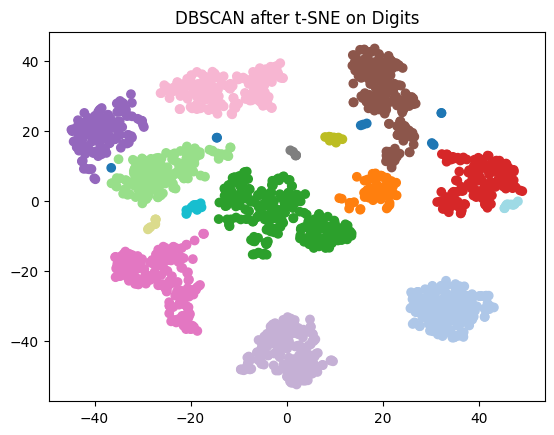

In [13]:
# 32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results
X_digits = StandardScaler().fit_transform(digits.data)
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_digits)
db = DBSCAN(eps=3, min_samples=5).fit(X_tsne)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=db.labels_, cmap='tab20')
plt.title("DBSCAN after t-SNE on Digits")
plt.show()

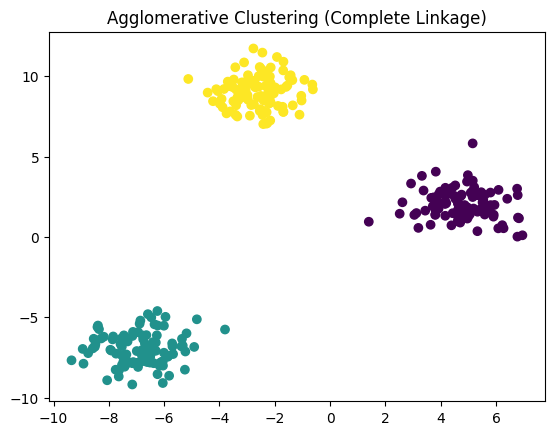

In [14]:
# 33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=agg.labels_, cmap='viridis')
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()

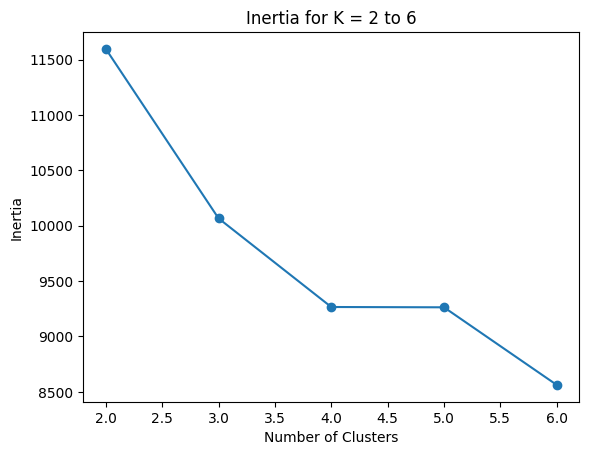

In [15]:
# 34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot
X_bc = StandardScaler().fit_transform(data.data)
inertias = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_bc)
    inertias.append(kmeans.inertia_)
plt.plot(range(2, 7), inertias, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Inertia for K = 2 to 6")
plt.show()

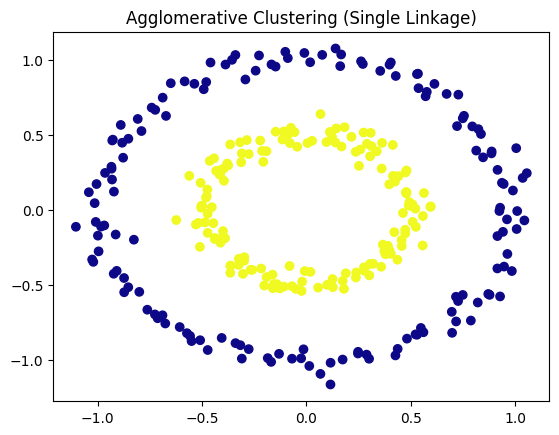

In [16]:
# 35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
agg = AgglomerativeClustering(n_clusters=2, linkage='single').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=agg.labels_, cmap='plasma')
plt.title("Agglomerative Clustering (Single Linkage)")
plt.show()

In [17]:
# 36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)
X_wine = StandardScaler().fit_transform(wine.data)
db = DBSCAN(eps=1.2, min_samples=5).fit(X_wine)
n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print("Number of clusters (excluding noise):", n_clusters)

Number of clusters (excluding noise): 0


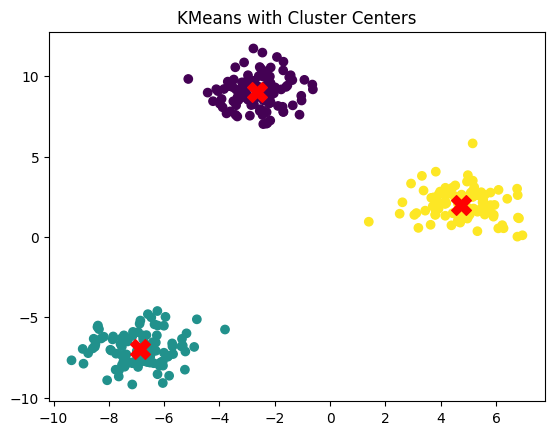

In [18]:
# 37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title("KMeans with Cluster Centers")
plt.show()

In [19]:
# 38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise
X_iris = StandardScaler().fit_transform(iris.data)
db = DBSCAN(eps=0.6, min_samples=5).fit(X_iris)
print("Number of noise samples:", list(db.labels_).count(-1))

Number of noise samples: 26


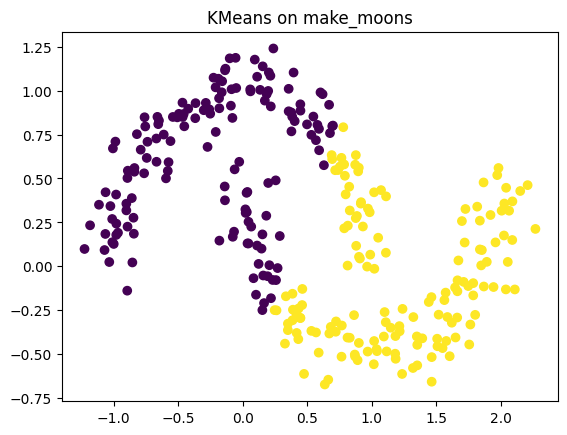

In [20]:
# 39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("KMeans on make_moons")
plt.show()

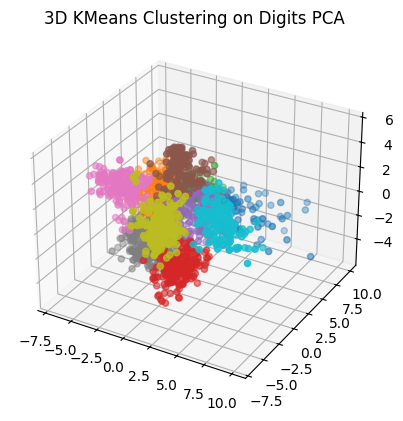

In [21]:
# 40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot
X_digits = StandardScaler().fit_transform(digits.data)
X_pca = PCA(n_components=3).fit_transform(X_digits)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_, cmap='tab10')
ax.set_title("3D KMeans Clustering on Digits PCA")
plt.show()